In [ ]:
library(ggplot2)
library(scales)
options(repr.plot.height=5)

In [ ]:
df = read.csv('clean.csv')

In [ ]:
library(segmented)

normal.lm = lm(log(Value) ~ Year, data=df)

segmented.lm = segmented(normal.lm, data=df)

predicted = exp(predict(segmented.lm, newdata=data.frame(Year=df$Year)))

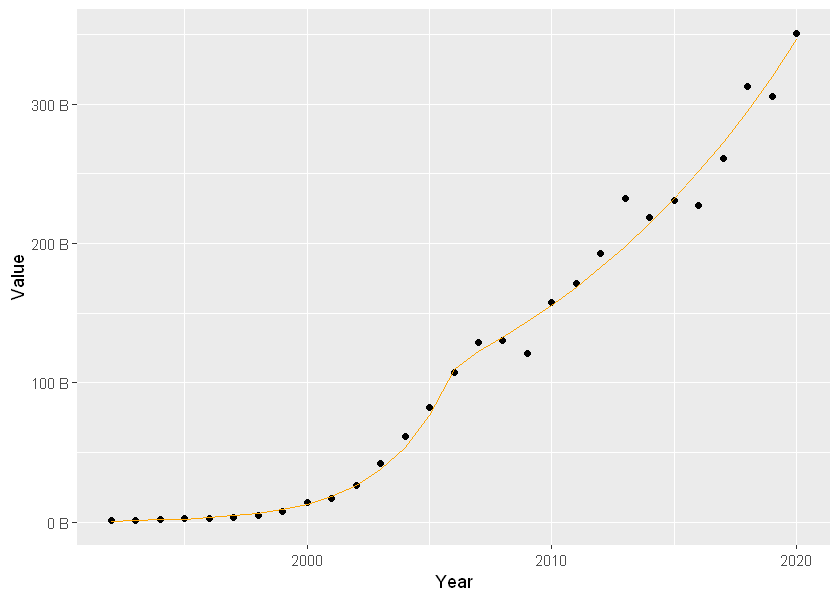

In [4]:
ggplot(df, aes(Year, Value)) + geom_point() + geom_line(aes(Year, predicted), color="orange") +
scale_y_continuous(labels= unit_format(unit="B", scale=1e-9))
ggsave("graph.png", width=4, height=2)

In [6]:
predicted.2022 = exp(predict(segmented.lm, newdata=data.frame(Year=2022)))

In [7]:
predicted.2022 * 1e-9 # Billions

1 
406.436

In [8]:
summary(segmented.lm)


	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = normal.lm, data = df)

Estimated Break-Point(s):
               Est. St.Err
psi1.Year 2006.118    0.3

Meaningful coefficients of the linear terms:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.901e+02  1.327e+01  -52.00   <2e-16 ***
Year         3.567e-01  6.638e-03   53.73   <2e-16 ***
U1.Year     -2.767e-01  9.915e-03  -27.91       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1111 on 25 degrees of freedom
Multiple R-Squared: 0.9972,  Adjusted R-squared: 0.9968 

Convergence attained in 1 iter. (rel. change 2.428e-08)